In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Cleansed_data.csv")
df.head()

,Unnamed: 0,Phone_Names,Price,No_of_buyers,Phone_features
0,2,Vivo Y73,20990,1410,8GB_128GB
1,3,Vivo Y33s,18990,293,8GB_128GB
2,4,Vivo Y72 5G,20990,193,8GB_128GB
3,5,Vivo Y21,15490,319,4GB_128GB
4,6,Samsung Galaxy M32 5G,16999,70,6GB_128GB


## Performing Few feature engineering

**Creating few columns**

**Then we can proceed with the analysis**


In [3]:
df.drop(columns="Unnamed: 0", inplace=True)
df.head()

,Phone_Names,Price,No_of_buyers,Phone_features
0,Vivo Y73,20990,1410,8GB_128GB
1,Vivo Y33s,18990,293,8GB_128GB
2,Vivo Y72 5G,20990,193,8GB_128GB
3,Vivo Y21,15490,319,4GB_128GB
4,Samsung Galaxy M32 5G,16999,70,6GB_128GB


In [8]:
df["company"] = df["Phone_Names"].apply(lambda x: x.split()[0])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Phone_Names     34 non-null     object
 1   Price           34 non-null     int64 
 2   No_of_buyers    34 non-null     int64 
 3   Phone_features  34 non-null     object
 4   company         34 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


**lets do some analysis what phones are the best for users and should be in local market to challenge Amazon**

<AxesSubplot:xlabel='No_of_buyers', ylabel='Price'>

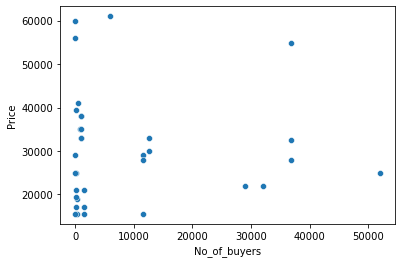

In [15]:
sns.scatterplot(data=df, x="No_of_buyers", y= "Price")

## We can inference that maximum of the buyers buy a phone between 0 to 40K

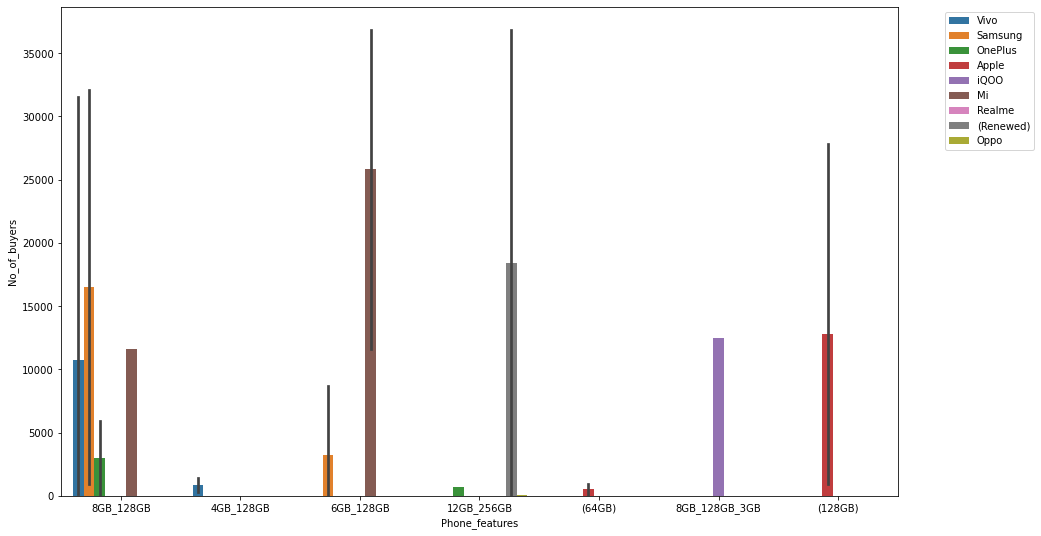

In [31]:
plt.figure(figsize=(15,9))
g= sns.barplot(data=df, x="Phone_features", y="No_of_buyers", hue= "company")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## MI has the maximum market share, we can see Iphones of 64GB has very less sales so does oneplus with 12GB 128GB and samsung excels in 128GB and 8GB category

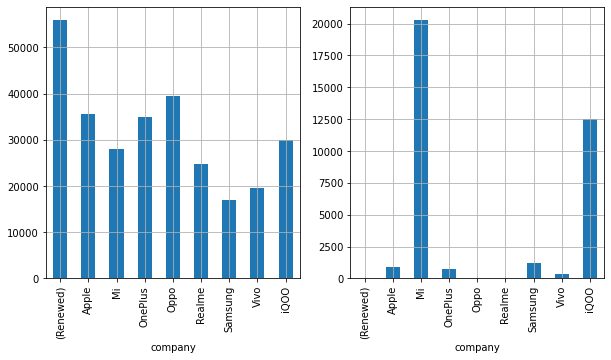

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df.Price.groupby(df.company).median().plot.bar()
plt.grid()
plt.subplot(1,2,2)
df.No_of_buyers.groupby(df.company).median().plot.bar()
plt.grid()


## Does it mean Since MI phones are cheap that is the reason the sell is maximum..? lets see some correlation

In [41]:
df[["No_of_buyers", "Price"]].corr()

,No_of_buyers,Price
No_of_buyers,1.000000,0.015427
Price,0.015427,1.000000


**We can neither confirm or deny any correlation after looking at this values**

**But we can clearly see once price = 1/100*No_of Buyers and vise Versa.** 

**There is a strong causation of this**

## we need more data to analyze to get more insights going back to the drawing board to fetch more mobile phone data using Selenium